In [1]:
# This program uses various data analysis techniques to analyze a dataset of online shoppers' intentions. The program uses data visualization techniques such as histograms and countplots to visualize the data, as well as transforming categorical variables. The program also uses standardization and oversampling techniques to balance the dataset and improve accuracy. Finally, the program uses a support vector classifier to train the model and generate the results with a user-defined grid search parameter. The program can be used to analyze any dataset with the same structure as the online shoppers' intentions dataset. 

In [2]:
# import all libraries to be used in the program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from numpy import where
from sklearn import svm
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/My Drive/Colab Notebooks/"

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/online_shoppers_intention.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# To print the number of rows and columns in the dataframe
print(df.shape)

(12330, 18)


In [4]:
# To print the information about the data set like the data types, number of entries etc
df.info()

# To print the first 5 rows of the dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# To print a summary of the dataframe with descriptive statistics, such as the mean, standard deviation, min, and max values for each column.
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Check for null values in data
null_count = df.isnull().sum()
print('\nTotal number of null values in dataset:', null_count.sum())


Total number of null values in dataset: 0


In [7]:
# Checking for number of unique values for each feature
uniques = df.nunique(axis=0)
print('\n', uniques)


 Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


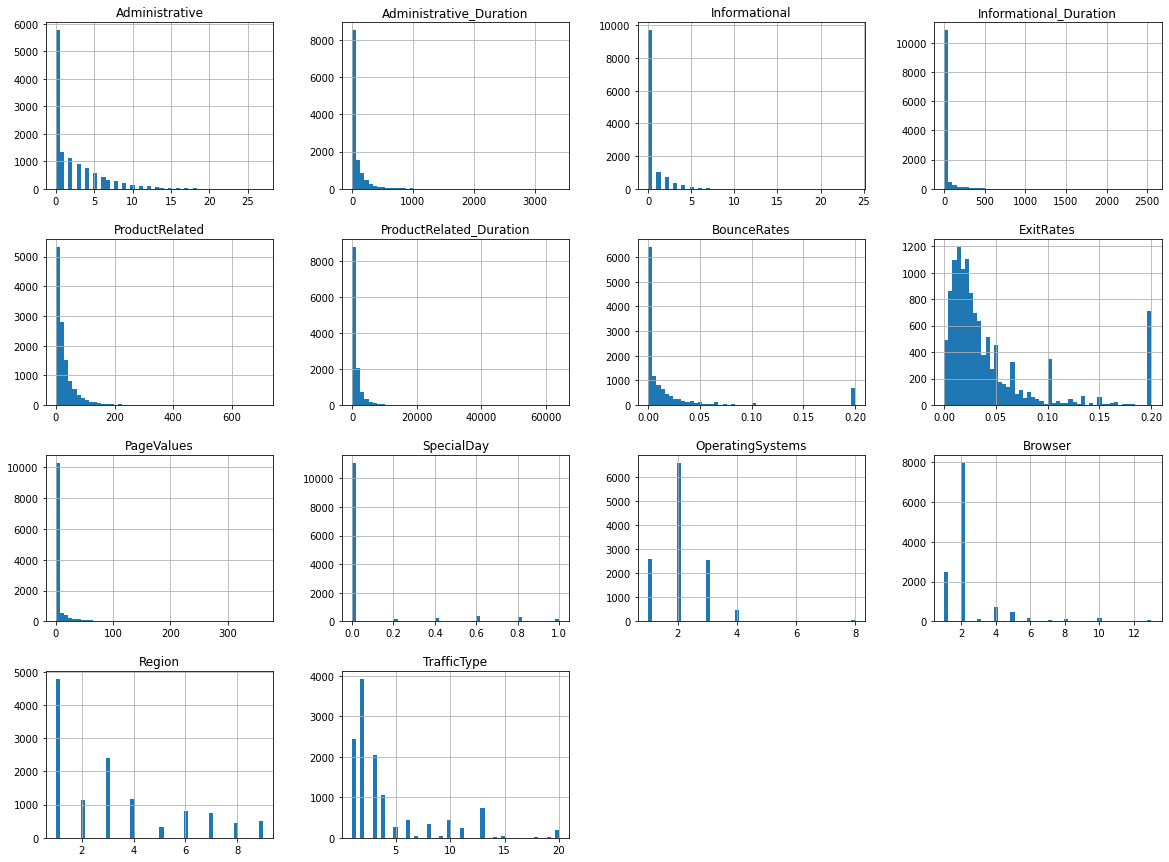

In [8]:
# To plot a histogram of the data set to visualize the distribution of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


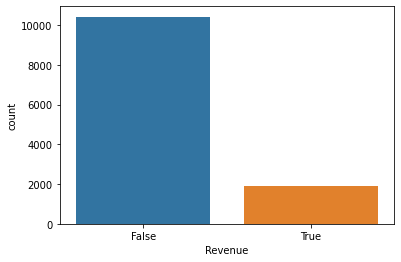

False    10422
True      1908
Name: Revenue, dtype: int64

In [9]:
# creating a countplot of the variable "Revenue" in the dataframe
sns.countplot(df['Revenue'])
plt.show()
df["Revenue"].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


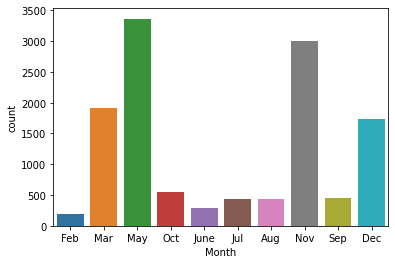

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [10]:
# creating a countplot of the variable "Month" in the dataframe
sns.countplot(df['Month'])
plt.show()
df["Month"].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


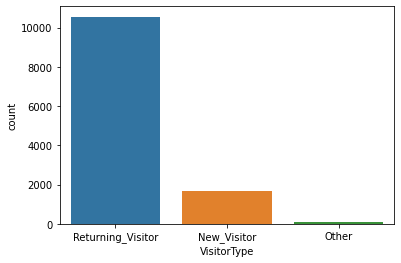

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [11]:
# creating a countplot of the variable "VisitorType" in the dataframe
sns.countplot(df['VisitorType'])
plt.show()
df["VisitorType"].value_counts()

In [12]:
# Transforming categorical variables
data = df.copy()

data = pd.get_dummies(data,columns=["Month"])
data = pd.get_dummies(data,columns=["OperatingSystems"])
data = pd.get_dummies(data,columns=["Browser"])
data = pd.get_dummies(data,columns=["Region"])
data = pd.get_dummies(data,columns=["TrafficType"])
data = pd.get_dummies(data,columns=["VisitorType"])
data["Weekend"] = data["Weekend"].map({True:1, False:0})
data["Revenue"] = data["Revenue"].map({True:1, False:0})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Weekend                        12330 non-null  int64  
 11  Revenue                        12330 non-null  int64  
 12  Month_Aug                      12330 non-null 

In [13]:
# dropping the referrence varibles/columns
data.drop(labels = ['Month_Feb' , 'OperatingSystems_1' , 'Browser_1' ,  'Region_1' , 'TrafficType_1' , 'VisitorType_New_Visitor' ],
                axis = 1, inplace = True)

In [14]:
# standardizing the data
X_need_scaling = data.drop(labels=['Revenue'], axis=1)
X = preprocessing.scale(X_need_scaling)
y = data["Revenue"]

# checking the shape of X and y variables
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (12330, 68)
Shape of y:  (12330,)


Counter({0: 10422, 1: 1908})


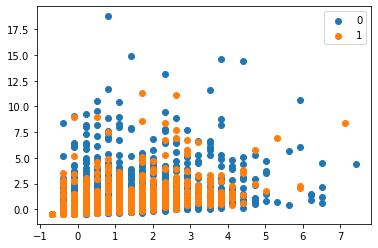

In [15]:
# creating a scatter plot of Revenue with class labels

counter = Counter(y)
print(counter)
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [16]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# checking the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 68)
Shape of y_train : (8631,)
Shape of x_test : (3699, 68)
Shape of y_test : (3699,)


In [17]:
# checking the number of 1s and 0s in the train set before over sampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# using SMOTE (Synthetic Minority Oversampling Technique) to oversample the train set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# checking the number of 1s and 0s in the train set after over sampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1286
Before OverSampling, counts of label '0': 7345 

After OverSampling, the shape of train_X: (14690, 68)
After OverSampling, the shape of train_y: (14690,) 

After OverSampling, counts of label '1': 7345
After OverSampling, counts of label '0': 7345


Counter({0: 7345, 1: 7345})


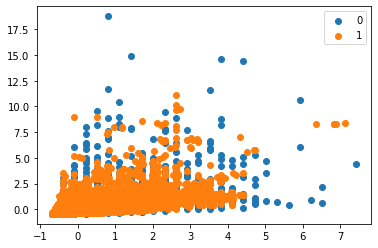

In [18]:
# creating a scatter plot of training data with class labels, to visualize the balance of the dataset.

counter = Counter(y_train_res)
print(counter)
for label, _ in counter.items():
 row_ix = where(y_train_res == label)[0]
 plt.scatter(X_train_res[row_ix, 0], X_train_res[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [19]:
# creating a parameter grid that will be used in a GridSearchCV
parameters = {'C': np.linspace(1, 10, 10)}

# LogisticRegression object
lr = LogisticRegression(solver='liblinear')

# GridSearchCV to find the best parameters for the Logistic Regression model
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(X_train_res, y_train_res)

# To print the accuracy of the model on the train set
print("The accuracy of the Logistic Regression model on the train set:" )
clf.score(X_train_res, y_train_res)

The accuracy of the Logistic Regression model on the train set:


0.8505105513955071

In [20]:
# prints the best parameters for the model
clf.best_params_

{'C': 3.0}

In [21]:
# creating a new LogisticRegression object with the best parameters and fit the model to the train set
lr1 = LogisticRegression(C=3,penalty='l1', solver='liblinear')
lr1.fit(X_train_res, y_train_res)

# To print the accuracy of the model on the test set
print("The accuracy of the Logistic Regression model on the test set:" )
lr1.score(X_test,y_test)

The accuracy of the Logistic Regression model on the test set:


0.8469856718031901

The confusion matrix of the Logistic Regression model on the test set:


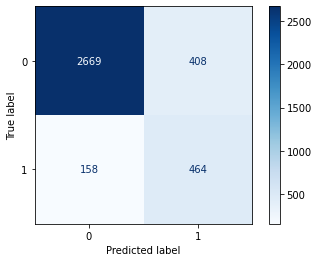

In [22]:
# predict the target variable on the test set
y_pred = lr1.predict(X_test)

# create a confusion matrix to evaluate the performance of the model
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
print("The confusion matrix of the Logistic Regression model on the test set:" )

# Set colors for confusion matrix
disp.plot(cmap=plt.cm.Blues)

plt.show()

roc_auc_0:  0.893155524809629
roc_auc_1:  0.893155524809629 



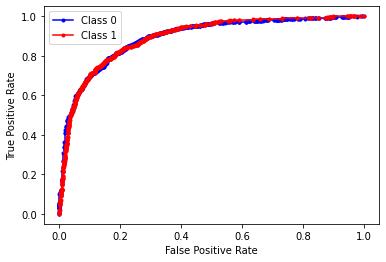


 Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      3077
           1       0.53      0.75      0.62       622

    accuracy                           0.85      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.87      0.85      0.86      3699



In [23]:
yhat = lr1.predict_proba(X_test)   # probability

# Compute ROC curve and ROC area for each class
# class 0
fpr_0, tpr_0, _ = roc_curve(y_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(y_test, 1-yhat[:, 0])  # either
roc_auc_0 = auc(fpr_0, tpr_0)               # or

# class 1
fpr_1, tpr_1, _ = roc_curve(y_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y_test, yhat[:, 1])    # either
roc_auc_1 = auc(fpr_1, tpr_1)               # or

# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n", "Classification report for Logistic Regression: \n", classification_report(y_test, y_pred))

In [24]:
# creating simple Logistic Regression model without GridSearchCV
clf = LogisticRegression()
clf.fit(X_train_res,y_train_res)

# To print the accuracy of the model on the test set
print("The accuracy of the Logistic Regression model on the test set:" )
clf.score(X_test,y_test)

The accuracy of the Logistic Regression model on the test set:


0.8472560151392268

[1 0 0 ... 0 0 0]
[[0.49895675 0.50104325]
 [0.76946816 0.23053184]
 [0.54425149 0.45574851]
 ...
 [0.95998069 0.04001931]
 [0.80454304 0.19545696]
 [0.77606371 0.22393629]]
roc_auc_0:  0.8927338713638269
roc_auc_1:  0.8927338713638269 



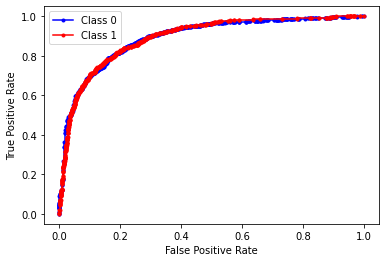


 Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      3077
           1       0.53      0.75      0.62       622

    accuracy                           0.85      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.87      0.85      0.86      3699



In [25]:


yhat = clf.predict_proba(X_test)   # probability
y_pred = clf.predict(X_test)       # class label

print(y_pred)
print(yhat)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

# class 0
fpr_0, tpr_0, _ = roc_curve(y_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(y_test, 1-yhat[:, 0])  # either
roc_auc_0 = auc(fpr_0, tpr_0)               # or

# class 1
fpr_1, tpr_1, _ = roc_curve(y_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y_test, yhat[:, 1])    # either
roc_auc_1 = auc(fpr_1, tpr_1)               # or

# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n", "Classification report: \n", classification_report(y_test, y_pred))

In [26]:
# Training an SVM Classifier using Linear Kernel without cross-validation
clf = svm.SVC(kernel="linear", probability=True)
clf.fit(X_train_res, y_train_res)

# To print the accuracy of the model on the test set
print("The accuracy of the SVM Liner model on the test set:" )
clf.score(X_test,y_test)

The accuracy of the SVM Liner model on the test set:


0.8680724520140578

In [27]:
yhat = clf.predict_proba(X_test)
y_pred = clf.predict(X_test) # class label

# print(clf.score(X_test,y_test), '\n') # mean accuracy
# print(clf.decision_function(X_test), '\n') # Distance of X to hyperplane

roc_auc_0:  0.9042465256696557
roc_auc_1:  0.9042465256696558 



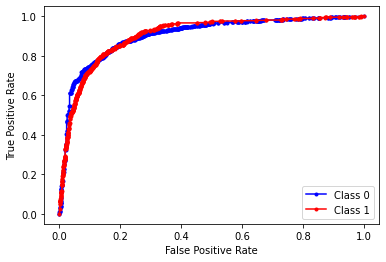


 Classification report for SVM Linear: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      3077
           1       0.59      0.73      0.65       622

    accuracy                           0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.88      0.87      0.87      3699



In [28]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

# class 0
fpr_0, tpr_0, _ = roc_curve(y_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(y_test, 1-yhat[:, 0])  # either
roc_auc_0 = auc(fpr_0, tpr_0)               # or

# class 1
fpr_1, tpr_1, _ = roc_curve(y_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y_test, yhat[:, 1])    # either
roc_auc_1 = auc(fpr_1, tpr_1)               # or

# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n", "Classification report for SVM Linear: \n", classification_report(y_test, y_pred))

In [29]:
# Training an SVM Classifier using RBF Kernel without cross-validation
clf = svm.SVC(kernel="rbf", probability=True)
clf.fit(X_train_res, y_train_res)

# To print the accuracy of the model on the test set
print("The accuracy of the SVM RBF model on the test set:" )
clf.score(X_test,y_test)

The accuracy of the SVM RBF model on the test set:


0.8480670451473371

roc_auc_0:  0.8701252524956973
roc_auc_1:  0.8701252524956974 



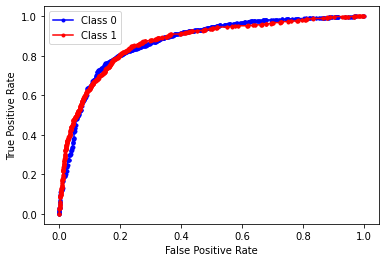


 Classification report for SVM RBF Kernel: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      3077
           1       0.54      0.67      0.60       622

    accuracy                           0.85      3699
   macro avg       0.73      0.78      0.75      3699
weighted avg       0.86      0.85      0.85      3699



In [30]:
yhat = clf.predict_proba(X_test)   # probability
y_pred = clf.predict(X_test)       # class label

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

# class 0
fpr_0, tpr_0, _ = roc_curve(y_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(y_test, 1-yhat[:, 0])  # either
roc_auc_0 = auc(fpr_0, tpr_0)               # or

# class 1
fpr_1, tpr_1, _ = roc_curve(y_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y_test, yhat[:, 1])    # either
roc_auc_1 = auc(fpr_1, tpr_1)               # or

# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n", "Classification report for SVM RBF Kernel: \n", classification_report(y_test, y_pred))

In [31]:
# Training an SVM Classifier using Sigmoid Kernel  without cross-validation
clf = svm.SVC(kernel="sigmoid", probability=True)
clf.fit(X_train_res,y_train_res)

# To print the accuracy of the model on the test set
print("The accuracy of the SVM Sigmoid model on the test set:" )
clf.score(X_test,y_test)

The accuracy of the SVM Sigmoid model on the test set:


0.7564206542308732

roc_auc_0:  0.8083619051002825
roc_auc_1:  0.8083619051002825 



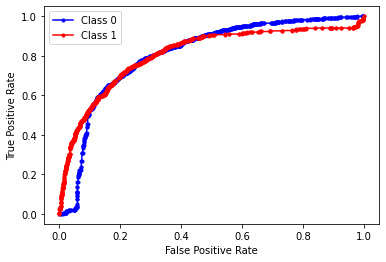


 Classification report for SVM Sigmoid Kernel: 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      3077
           1       0.38      0.74      0.51       622

    accuracy                           0.76      3699
   macro avg       0.66      0.75      0.67      3699
weighted avg       0.84      0.76      0.78      3699



In [32]:
yhat = clf.predict_proba(X_test)   # probability
y_pred = clf.predict(X_test)       # class label

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score

# class 0
fpr_0, tpr_0, _ = roc_curve(y_test, yhat[:, 0], pos_label=0)
roc_auc_0 = roc_auc_score(y_test, 1-yhat[:, 0])  # either
roc_auc_0 = auc(fpr_0, tpr_0)               # or

# class 1
fpr_1, tpr_1, _ = roc_curve(y_test, yhat[:, 1], pos_label=1)
roc_auc_1 = roc_auc_score(y_test, yhat[:, 1])    # either
roc_auc_1 = auc(fpr_1, tpr_1)               # or

# plot ROC curves
print('roc_auc_0: ', roc_auc_0)
print('roc_auc_1: ', roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n", "Classification report for SVM Sigmoid Kernel: \n", classification_report(y_test, y_pred))

                                  params  rank_test_score  mean_test_score  \
kernel                                                                       
rbf                    {'kernel': 'rbf'}                1         0.902655   
3_poly   {'degree': 3, 'kernel': 'poly'}                2         0.864738   
linear              {'kernel': 'linear'}                3         0.860585   
2_poly   {'degree': 2, 'kernel': 'poly'}                4         0.819129   
sigmoid            {'kernel': 'sigmoid'}                5         0.775630   

         std_test_score  
kernel                   
rbf            0.016675  
3_poly         0.013841  
linear         0.012226  
2_poly         0.020395  
sigmoid        0.010112  


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


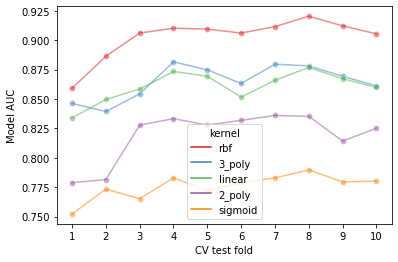

In [33]:
# comparing different type of SVM Models Using GridSearchCV

parameters = [
    {"kernel": ["sigmoid"]},
    {"kernel": ["poly"], "degree": [2,3]},
    {"kernel": ["rbf"]}, 
    {"kernel": ["linear"]}  
]

# creating new svc object using SVC class from the sklearn.svm module
svc = svm.SVC()
# creating a GridSearchCV object with the SVC object using the specified parameters to do 10-fold cross-validation
clf = GridSearchCV(svc, parameters, cv=10)
# fitting the GridSearchCV object to the training data
clf.fit(X_train_res, y_train_res)

# sorting the cv_results_ dictionary, which contains the cross-validation results
sorted(clf.cv_results_.keys())

# createing a pandas DataFrame from the cv_results_ dictionary
results_df = pd.DataFrame(clf.cv_results_)
# sorting the DataFrame by the rank_test_score column
results_df = results_df.sort_values(by=["rank_test_score"])
# setting the index of the DataFrame to the hyperparameter combinations, and renames the index column as "kernel"
results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis("kernel")
print(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# Create a dictionary mapping the column names
column_mapping = {f'split{i}_test_score': f'{i+1}' for i in range(10)}

# Rename columns using the mapping
model_scores.rename(columns=column_mapping, inplace=True)

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold")
ax.set_ylabel("Model AUC")
ax.tick_params(bottom=True, labelbottom=True)
plt.show()

                                  params  rank_test_score  mean_test_score  \
kernel                                                                       
rbf                    {'kernel': 'rbf'}                1         0.955715   
3_poly   {'degree': 3, 'kernel': 'poly'}                2         0.936667   
linear              {'kernel': 'linear'}                3         0.934184   
2_poly   {'degree': 2, 'kernel': 'poly'}                4         0.897649   
sigmoid            {'kernel': 'sigmoid'}                5         0.838759   

         std_test_score  
kernel                   
rbf            0.003349  
3_poly         0.003128  
linear         0.004169  
2_poly         0.004840  
sigmoid        0.010471  


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


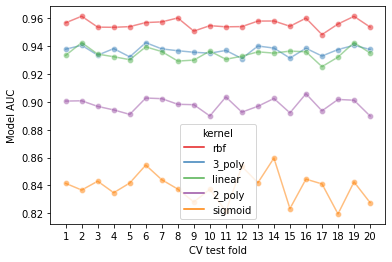

In [34]:
# comparing different type of SVM Models Using GridSearchCV and RepeatedStratifiedKFold

svc = SVC(random_state=0)
# createing a RepeatedStratifiedKFold object named cv, which is a cross-validation object that will use 5-fold stratified cross-validation and repeat it 4 times. The random_state is set to 0.
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=0)
# creating a GridSearchCV object named search with the estimator set to svc, the parameters to search to the parameter grid, the scoring method to roc_auc, and the cross-validation object to cv.
search = GridSearchCV(estimator=svc, param_grid=parameters, scoring="roc_auc", cv=cv)
# fitting the GridSearchCV object to the training data
search.fit(X_train_res, y_train_res)

# createing a pandas DataFrame from the cv_results_ dictionary
results_df = pd.DataFrame(search.cv_results_)
# sorting the DataFrame by the rank_test_score column
results_df = results_df.sort_values(by=["rank_test_score"])
# setting the index of the DataFrame to the hyperparameter combinations, and renames the index column as "kernel"
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
print(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# Create a dictionary mapping the column names
column_mapping = {f'split{i}_test_score': f'{i+1}' for i in range(30)}

# Rename columns using the mapping
model_scores.rename(columns=column_mapping, inplace=True)

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold")
ax.set_ylabel("Model AUC")
ax.tick_params(bottom=True, labelbottom=True)
plt.show()